In [65]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 14 08:49:00 2014

@author: ruben
"""

from brian2 import *
from scipy import signal
import numpy as np

#tau_e=1*ms # AMPA synapse

eqs= '''
dq1/dt = (-6.5407*q1 - 3.1492*q2 + I)/(50*ms):volt
dq2/dt = (q1)/(50 * ms):volt
dq3/dt = (-0.4*q3 + I )/(50*ms):volt
y = 5.2640*q1 + 2.2833*q2 + 0.1211*I + q3:volt
I : volt
'''
eqs2 = '''
stimulus = 3000*mV * int((t % (5*second))<2*second) - 1500*mV: volt
y = stimulus - I:volt 
I : volt
'''

tf=NeuronGroup(1,model=eqs,threshold='y>-50*mV')
st=NeuronGroup(1,model=eqs2,threshold='y>-50*mV')

S1 = Synapses(st, tf,  '''
             w : 1
             my = I_pre:volt''',
             on_pre='''
             I_post = w*y_pre
             '''
             )
S2 = Synapses(tf, st, '''
             w : 1
             ''',
             on_pre=
             '''
                 I_post = w*y_pre
             ''')
             
S1.connect(i=0, j=0)
S2.connect(i=0, j=0)

#N = 10
#J = 10 /(1*second)
#rates=10*Hz
#layer1=PoissonGroup(N,rates=rates)

#backNoise=Synapses(tf,layer1, 'w: siemens',on_pre='ge += w')
#backNoise.connect(p=0.02)
#backNoise.w = 2*nS

#t = np.linspace(0,10,1/defaultclock.dt, endpoint=False)
#visual = signal.square(2 * np.pi * 0.25 * t, duty=0.5)*mV
#tf.u = signal.square(2 * np.pi * 0.25 * t, duty=0.5)
#tf.I = TimedArray(visual, dt=defaultclock.dt)
#tf.I = 1000*mV
#M=StateMonitor(tf,True,record=True)
#N=StateMonitor(st,True,record=True)
M = StateMonitor(S1,['w','my'],record=True)
run(10*second)
#plot(M.times/ms, M[0]/mV)
#plot(M.T/mV)
#show()

TypeError: Cannot link variable __source_my_synapses_1_I_pre to I_pre in group synapses_1 -- need to precalculate direct indices but index _presynaptic_idx can change

NameError: name 'visualise_connectivity' is not defined

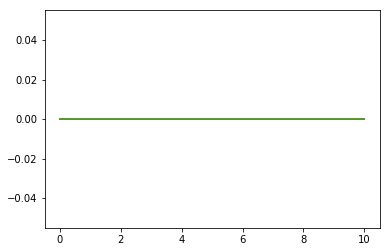

In [57]:
plot(M.t, M.y[0])
plot(M.t, M.I[0])
plot(M.t, M.I[0])


In [48]:
for y in N.variables:
    print(y)

t
N
_indices
_clock_t
_clock_dt
_source_I
I
__source_stimulus_neurongroup_6_t
_source_stimulus
stimulus
__source_y_neurongroup_6_I
___source_y_neurongroup_6_stimulus_neurongroup_6_t
__source_y_neurongroup_6_stimulus
_source_y
y
_to_record_I
_to_record_stimulus
_to_record_y


In [49]:
for y in M.variables:
    print(y)

t
N
_indices
_clock_t
_clock_dt
_source_q3
q3
_source_I
I
_source_q1
q1
_source_q2
q2
__source_y_neurongroup_4_I
__source_y_neurongroup_4_q1
__source_y_neurongroup_4_q3
__source_y_neurongroup_4_q2
_source_y
y
_to_record_q3
_to_record_I
_to_record_q1
_to_record_q2
_to_record_y


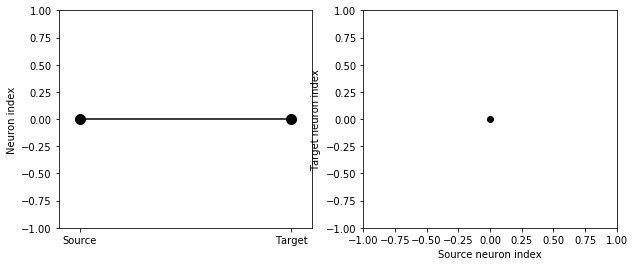

In [59]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    

visualise_connectivity(S2)